### Importing Libraries:

In [1]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report

import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import tensorflow.keras as keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import tensorflow.keras as keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

2025-04-20 00:29:07.231512: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-20 00:29:07.239594: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745126947.249248 1317148 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745126947.251892 1317148 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745126947.259259 1317148 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
!pip install seaborn

## Question 1:
### Data Exploration & Preparation:

Training data size: 60000 images
Testing data size: 10000 images
Image dimensions (Training): 28x28
Image dimensions (Testing): 28x28
Number of unique classes: 10


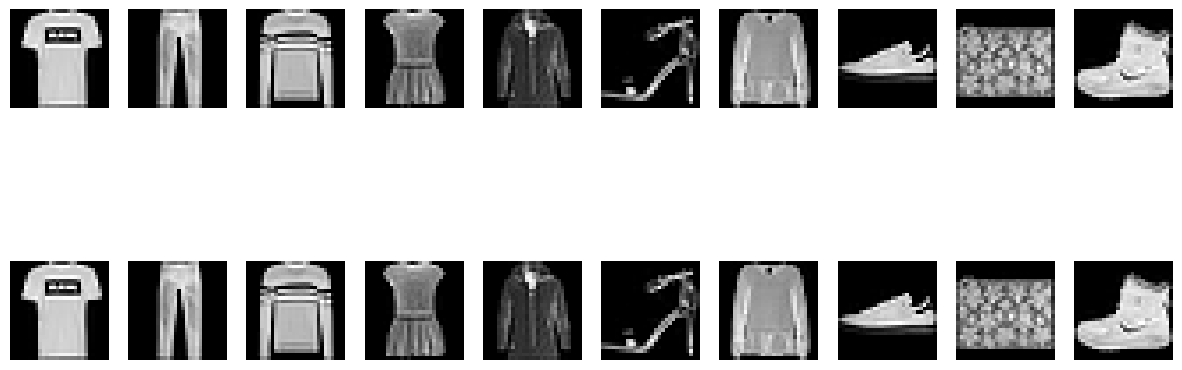

In [3]:

# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Verify the size of the datasets
print(f"Training data size: {x_train.shape[0]} images")
print(f"Testing data size: {x_test.shape[0]} images")

# Verify the dimensions of each image
print(f"Image dimensions (Training): {x_train.shape[1]}x{x_train.shape[2]}")
print(f"Image dimensions (Testing): {x_test.shape[1]}x{x_test.shape[2]}")

# Verify the number of classes
print(f"Number of unique classes: {len(np.unique(y_train))}")

# Normalize the images to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshaping for CNNs (adding channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encoding labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Visualizing sample images (20 images in this case)
fig, ax = plt.subplots(2, 10, figsize=(15, 6))  # 2 rows, 10 columns
for i in range(20):
    ax[i // 10, i % 10].imshow(x_train[y_train.argmax(axis=1) == i % 10][0], cmap='gray')
    ax[i // 10, i % 10].axis('off')
plt.show()


### Model Development:

In [4]:
# Model 1: Shallow Neural Network
model1 = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/home/asmae/Documents/wsu/sprinig-2025/machine-learning/assignment3_ML/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1745126950.263315 1317148 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5414 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [5]:
# Model 2: Basic CNN
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/home/asmae/Documents/wsu/sprinig-2025/machine-learning/assignment3_ML/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Model 3: Deeper CNN
model3 = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Print summaries of models
model1.summary()
model2.summary()
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,522 (3.42 MB)

 Trainable params: 896,522 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

### Training & Validation:

#### Training Model 1:

In [8]:
import tensorflow as tf
print("TF version:", tf.__version__)
print("NumS:", len(tf.config.list_physical_devices('GPU')))


TF version: 2.19.0
NumS: 1


In [9]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

Physical devices cannot be modified after being initialized


In [10]:
history1 = model1.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test))
model1.save_weights('model1_best_weights.weights.h5')

Epoch 1/1000


I0000 00:00:1745126951.312992 1317631 service.cc:152] XLA service 0x7ece18018360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745126951.313005 1317631 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2025-04-20 00:29:11.323087: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745126951.367660 1317631 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-20 00:29:11.731221: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_126', 4 bytes spill stores, 4 bytes spill loads



 107/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5687 - loss: 1.2462

I0000 00:00:1745126952.338510 1317631 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7831 - loss: 0.6249 - val_accuracy: 0.8354 - val_loss: 0.4610
Epoch 2/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8597 - loss: 0.3902 - val_accuracy: 0.8619 - val_loss: 0.3870
Epoch 3/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8761 - loss: 0.3396 - val_accuracy: 0.8657 - val_loss: 0.3608
Epoch 4/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8839 - loss: 0.3167 - val_accuracy: 0.8705 - val_loss: 0.3612
Epoch 5/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8927 - loss: 0.2915 - val_accuracy: 0.8761 - val_loss: 0.3413
Epoch 6/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8965 - loss: 0.2787 - val_accuracy: 0.8752 - val_loss: 0.3423
Epoch 7/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9022 - loss: 0.2642 - val_accuracy: 0.8736 - val_loss: 0.3467
Epoch 8/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9051 - loss: 0.2578

#### Training Model 2:

In [11]:
history2 = model2.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test))
model2.save_weights('model2_best_weights.weights.h5')

Epoch 1/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8175 - loss: 0.5164 - val_accuracy: 0.8824 - val_loss: 0.3308
Epoch 2/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9041 - loss: 0.2659 - val_accuracy: 0.8987 - val_loss: 0.2760
Epoch 3/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9216 - loss: 0.2145 - val_accuracy: 0.9076 - val_loss: 0.2527
Epoch 4/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9322 - loss: 0.1855 - val_accuracy: 0.9160 - val_loss: 0.2323
Epoch 5/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9441 - loss: 0.1530 - val_accuracy: 0.9119 - val_loss: 0.2522
Epoch 6/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9515 - loss: 0.1310 - val_accuracy: 0.9184 - val_loss: 0.2483
Epoch 7/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9588 - loss: 0.1082 - val_accuracy: 0.9191 - val_loss: 0.2556
Epoch 8/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9666 -

#### Training Model 3:

In [12]:
history3 = model3.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test))
model3.save_weights('model3_best_weights.weights.h5')

Epoch 1/1000


2025-04-20 01:37:25.667943: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_274', 4 bytes spill stores, 4 bytes spill loads



1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8008 - loss: 0.5508 - val_accuracy: 0.8826 - val_loss: 0.3234
Epoch 2/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9015 - loss: 0.2719 - val_accuracy: 0.8928 - val_loss: 0.2964
Epoch 3/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9191 - loss: 0.2231 - val_accuracy: 0.9065 - val_loss: 0.2533
Epoch 4/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9278 - loss: 0.1868 - val_accuracy: 0.9108 - val_loss: 0.2473
Epoch 5/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9401 - loss: 0.1563 - val_accuracy: 0.9110 - val_loss: 0.2607
Epoch 6/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9508 - loss: 0.1281 - val_accuracy: 0.9151 - val_loss: 0.2675
Epoch 7/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9590 - loss: 0.1072 - val_accuracy: 0.9142 - val_loss: 0.2793
Epoch 8/1000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9669 - loss: 0.0875

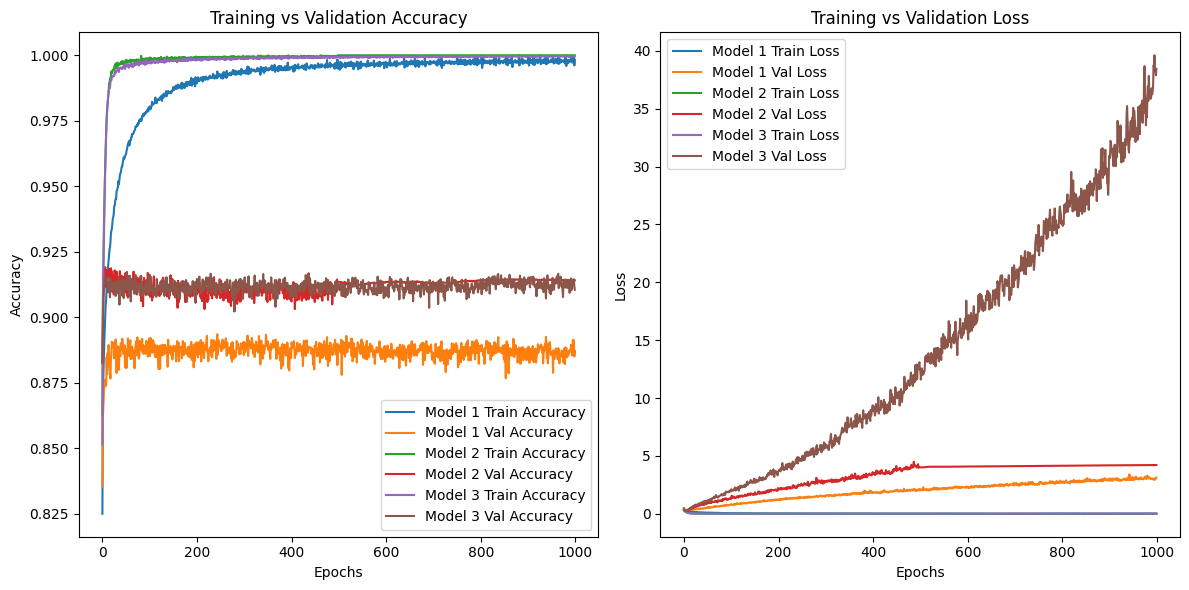

In [13]:
# Plotting training & validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Model 1 Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Model 1 Val Accuracy')
plt.plot(history2.history['accuracy'], label='Model 2 Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Model 2 Val Accuracy')
plt.plot(history3.history['accuracy'], label='Model 3 Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Model 3 Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Model 1 Train Loss')
plt.plot(history1.history['val_loss'], label='Model 1 Val Loss')
plt.plot(history2.history['loss'], label='Model 2 Train Loss')
plt.plot(history2.history['val_loss'], label='Model 2 Val Loss')
plt.plot(history3.history['loss'], label='Model 3 Train Loss')
plt.plot(history3.history['val_loss'], label='Model 3 Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Model Evaluation

#### Assess each model's performance on the test data, reporting accuracy.

In [14]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print(f"Test accuracy of Model 1: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8867 - loss: 3.0897
Test accuracy of Model 1: 0.8870999813079834


In [15]:
test_loss, test_acc = model2.evaluate(x_test, y_test)
print(f"Test accuracy of Model 2: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9089 - loss: 4.4861
Test accuracy of Model 2: 0.9140999913215637


In [16]:
test_loss, test_acc = model3.evaluate(x_test, y_test)
print(f"Test accuracy of Model 3: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9097 - loss: 40.2034
Test accuracy of Model 3: 0.9104999899864197


### 1. Construct a committee by averaging predictions of the three models.
### 2. Report on the combined accuracy of the committee.

In [17]:
# Get predictions for each model
predictions1 = model1.predict(x_test)
predictions2 = model2.predict(x_test)
predictions3 = model3.predict(x_test)

# Combine predictions (committee) by averaging the predicted probabilities
final_predictions = (predictions1 + predictions2 + predictions3) / 3

# Get the class with the highest probability for each prediction
final_predictions = final_predictions.argmax(axis=1)

# Compute accuracy for the committee
committee_accuracy = np.mean(final_predictions == y_test.argmax(axis=1))
print(f"Committee accuracy: {committee_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Committee accuracy: 0.924


### Performance Metrics & Analysis:

In [18]:
# Get predictions for each model
predictions1 = model1.predict(x_test)
predictions2 = model2.predict(x_test)
predictions3 = model3.predict(x_test)

# Combine predictions for the committee (averaging the predictions)
final_predictions = (predictions1 + predictions2 + predictions3) / 3
final_predictions = final_predictions.argmax(axis=1)  # Get the class with the highest score

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step


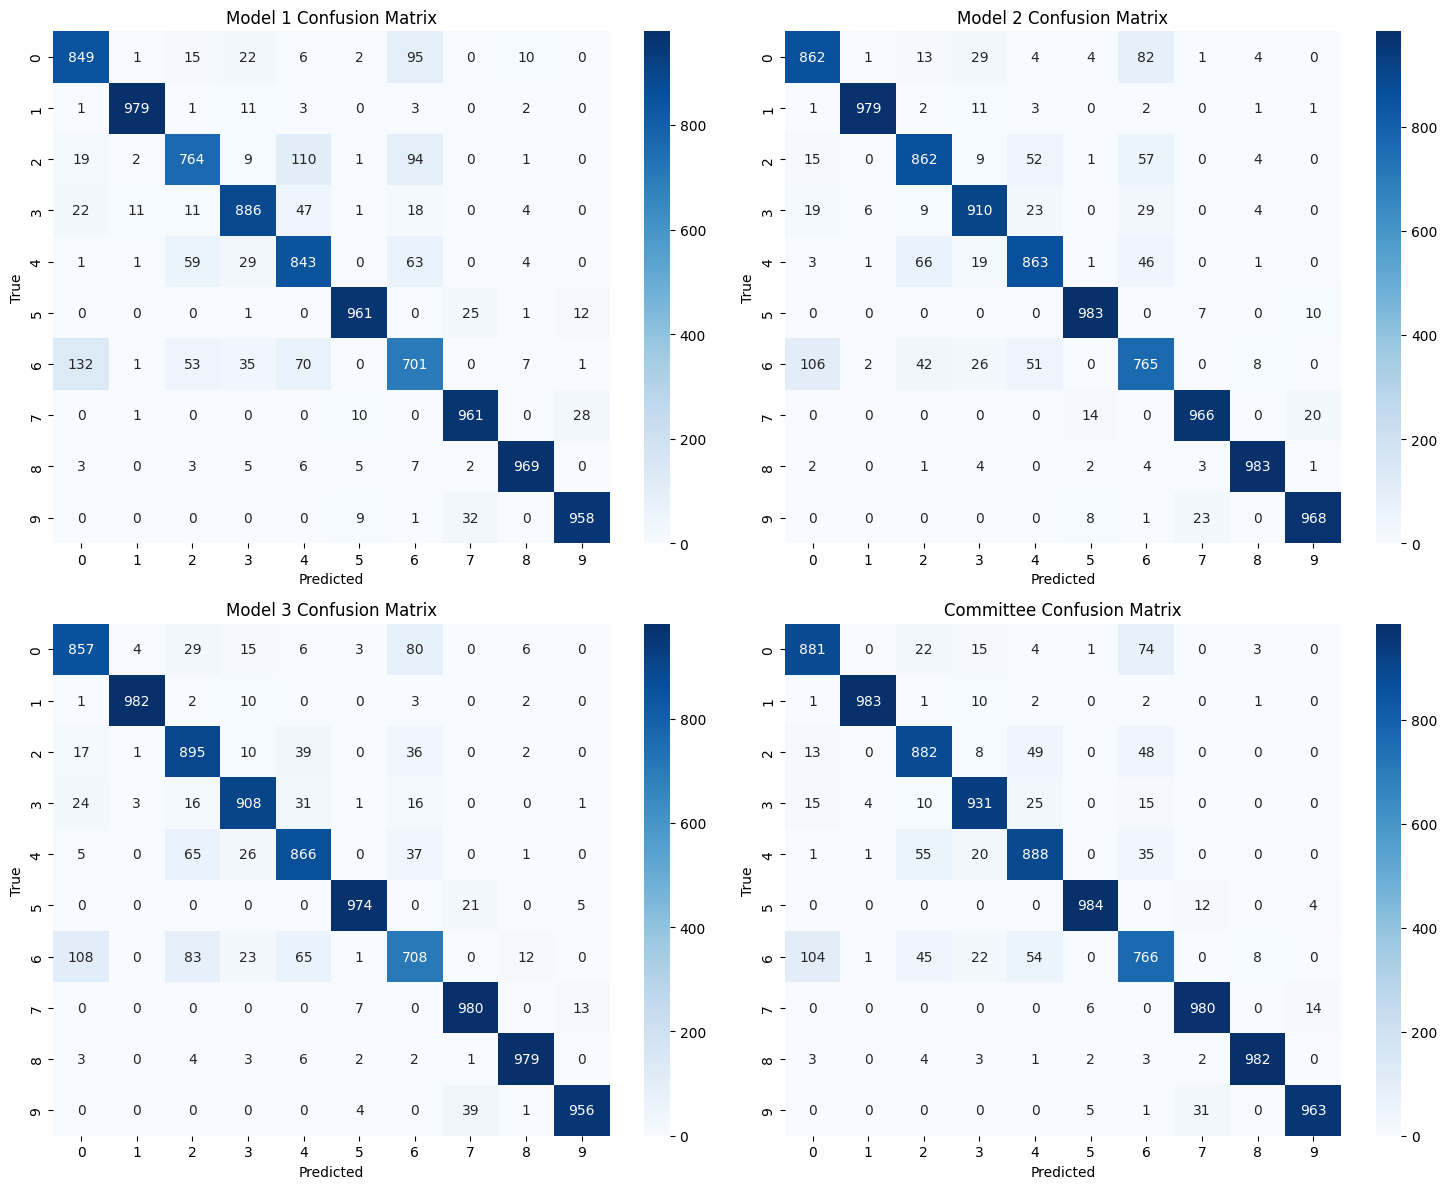

Model 1 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.84      0.76      0.80      1000
           3       0.89      0.89      0.89      1000
           4       0.78      0.84      0.81      1000
           5       0.97      0.96      0.97      1000
           6       0.71      0.70      0.71      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Model 2 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.98      0.98      1000
           2    

In [19]:
# Confusion matrix for models
cm1 = confusion_matrix(y_test.argmax(axis=1), predictions1.argmax(axis=1))
cm2 = confusion_matrix(y_test.argmax(axis=1), predictions2.argmax(axis=1))
cm3 = confusion_matrix(y_test.argmax(axis=1), predictions3.argmax(axis=1))

# Confusion matrix for the committee
cm_final = confusion_matrix(y_test.argmax(axis=1), final_predictions)

# Plot confusion matrix heatmaps
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Model 1 Confusion Matrix
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=ax[0, 0])
ax[0, 0].set_title("Model 1 Confusion Matrix")
ax[0, 0].set_xlabel('Predicted')
ax[0, 0].set_ylabel('True')

# Model 2 Confusion Matrix
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=ax[0, 1])
ax[0, 1].set_title("Model 2 Confusion Matrix")
ax[0, 1].set_xlabel('Predicted')
ax[0, 1].set_ylabel('True')

# Model 3 Confusion Matrix
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', ax=ax[1, 0])
ax[1, 0].set_title("Model 3 Confusion Matrix")
ax[1, 0].set_xlabel('Predicted')
ax[1, 0].set_ylabel('True')

# Committee Confusion Matrix
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', ax=ax[1, 1])
ax[1, 1].set_title("Committee Confusion Matrix")
ax[1, 1].set_xlabel('Predicted')
ax[1, 1].set_ylabel('True')

plt.tight_layout()
plt.show()

# Classification reports
cr1 = classification_report(y_test.argmax(axis=1), predictions1.argmax(axis=1))
cr2 = classification_report(y_test.argmax(axis=1), predictions2.argmax(axis=1))
cr3 = classification_report(y_test.argmax(axis=1), predictions3.argmax(axis=1))
cr_final = classification_report(y_test.argmax(axis=1), final_predictions)

# Print classification reports
print("Model 1 Classification Report:")
print(cr1)

print("Model 2 Classification Report:")
print(cr2)

print("Model 3 Classification Report:")
print(cr3)

print("Committee Classification Report:")
print(cr_final)


### Classification Report 

In [20]:
# Classification reports for each model and committee
cr1 = classification_report(y_test.argmax(axis=1), model1.predict(x_test).argmax(axis=1), output_dict=True)
cr2 = classification_report(y_test.argmax(axis=1), model2.predict(x_test).argmax(axis=1), output_dict=True)
cr3 = classification_report(y_test.argmax(axis=1), model3.predict(x_test).argmax(axis=1), output_dict=True)
cr_committee = classification_report(y_test.argmax(axis=1), final_predictions, output_dict=True)

# Convert the reports to DataFrame for easy visualization
df1 = pd.DataFrame(cr1).transpose()
df2 = pd.DataFrame(cr2).transpose()
df3 = pd.DataFrame(cr3).transpose()
df_committee = pd.DataFrame(cr_committee).transpose()

# Displaying the DataFrames in a readable format
print("Model 1 Classification Report")
print(df1)

print("Model 2 Classification Report")
print(df2)

print("Model 3 Classification Report")
print(df3)

print("Committee Classification Report")
print(df_committee)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step
Model 1 Classification Report
              precision  recall  f1-score     support
0              0.826680  0.8490  0.837691   1000.0000
1              0.982932  0.9790  0.980962   1000.0000
2              0.843267  0.7640  0.801679   1000.0000
3              0.887776  0.8860  0.886887   1000.0000
4              0.776959  0.8430  0.808633   1000.0000
5              0.971689  0.9610  0.966315   1000.0000
6              0.713849  0.7010  0.707366   1000.0000
7              0.942157  0.9610  0.951485   1000.0000
8              0.970942  0.9690  0.969970   1000.0000
9              0.958959  0.9580  0.958479   1000.0000
accuracy       0.887100  0.8871  0.887100      0.8871
macro avg      0.887521  0.8871  0.886947  10000.0000
weighted avg   0.887521  0.8871  0.886947  10000.0000
Model 2 Classification Report
              precision  recall  f1-score     support
0

## Extra Task

### Model Setup with Batch Normalization and Dropout

In [21]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the images to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshaping for CNNs (adding channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encoding labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Data Augmentation

In [22]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

### Defining the model with Batch Normalization and Dropout

In [23]:
model = keras.Sequential([
    layers.InputLayer(input_shape=x_train.shape[1:]),  # Input shape (28, 28, 1)
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

/home/asmae/Documents/wsu/sprinig-2025/machine-learning/assignment3_ML/venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


### Compiling the model

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,026 (1.61 MB)

 Trainable params: 421,834 (1.61 MB)

 Non-trainable params: 192 (768.00 B)

### Train the model:

In [25]:
# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=1000,
                    validation_data=(x_test, y_test))

Epoch 1/1000


/home/asmae/Documents/wsu/sprinig-2025/machine-learning/assignment3_ML/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.6499 - loss: 0.9765 - val_accuracy: 0.8221 - val_loss: 0.4782
Epoch 2/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7792 - loss: 0.5785 - val_accuracy: 0.8540 - val_loss: 0.3904
Epoch 3/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8104 - loss: 0.5033 - val_accuracy: 0.8260 - val_loss: 0.4340
Epoch 4/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8255 - loss: 0.4699 - val_accuracy: 0.8660 - val_loss: 0.3657
Epoch 5/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8341 - loss: 0.4453 - val_accuracy: 0.8793 - val_loss: 0.3270
Epoch 6/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8466 - loss: 0.4240 - val_accuracy: 0.8705 - val_loss: 0.3477
Epoch 7/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8463 - loss: 0.4175 - val_accuracy: 0.8740 - val_loss: 0.3320
Epoch 8/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8535 - loss: 0.3983 - val_accuracy

In [26]:
# Save the best model weights
model.save_weights('fashion_mnist_model_best.weights.h5')

### Advanced ensembling:  (Weighted Averaging)

In [27]:
# Predictions from the models (example)
predictions1 = model1.predict(x_test)
predictions2 = model2.predict(x_test)
predictions3 = model3.predict(x_test)

# Combine predictions (committee) by weighted averaging based on validation performance
weights = [0.5, 0.25, 0.25]  # Example weights, adjust based on validation performance
final_predictions = (weights[0] * predictions1 + weights[1] * predictions2 + weights[2] * predictions3)

# Get the class with the highest probability for each prediction
final_predictions = final_predictions.argmax(axis=1)

# Compute accuracy for the committee
committee_accuracy = np.mean(final_predictions == y_test.argmax(axis=1))
print(f"Committee accuracy: {committee_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
Committee accuracy: 0.9164


### Confusion Matrix Heatmaps

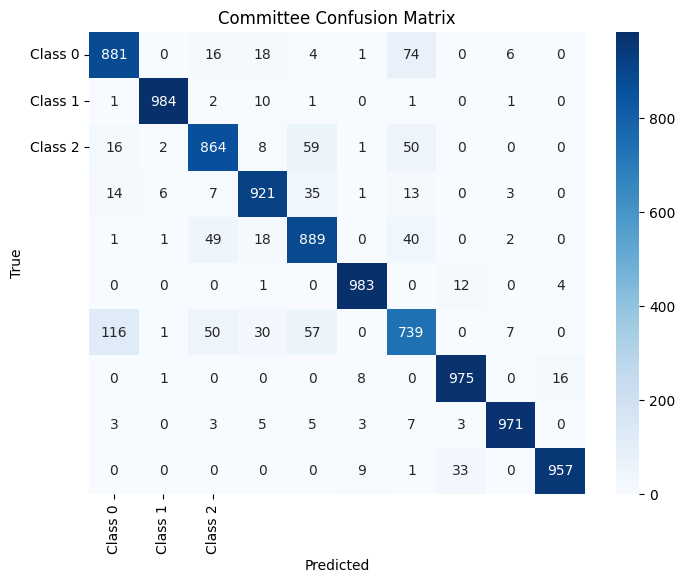

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2']  # Change to your actual class names

# Compute confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), final_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Committee Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Training Curves (Accuracy and Loss)

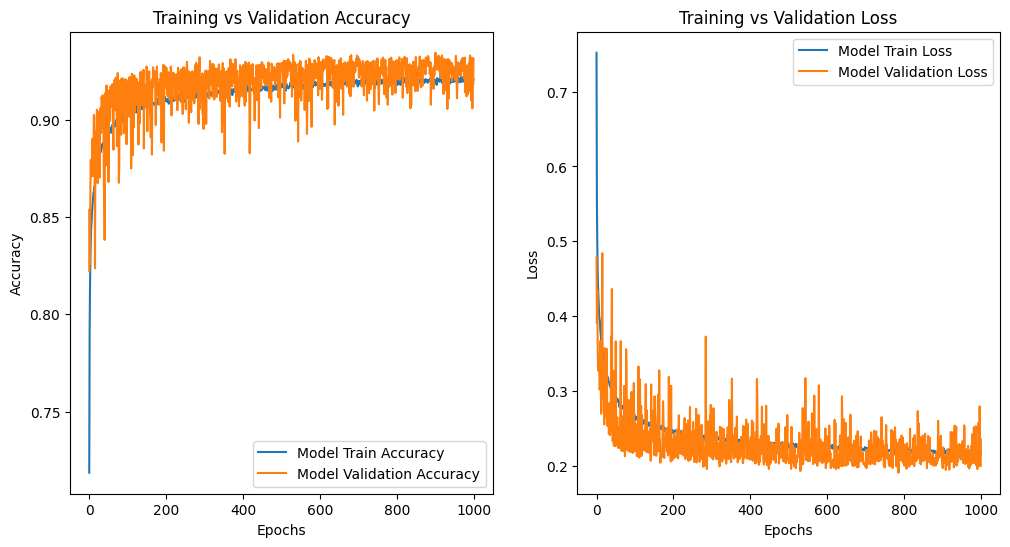

In [29]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Model Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Model Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Model Train Loss')
plt.plot(history.history['val_loss'], label='Model Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Classification Reports

In [30]:
# Classification reports for the committee and individual models
cr_committee = classification_report(y_test.argmax(axis=1), final_predictions)
print("Committee Classification Report")
print(cr_committee)

# You can also print classification reports for individual models like model1, model2, and model3
cr1 = classification_report(y_test.argmax(axis=1), model1.predict(x_test).argmax(axis=1))
cr2 = classification_report(y_test.argmax(axis=1), model2.predict(x_test).argmax(axis=1))
cr3 = classification_report(y_test.argmax(axis=1), model3.predict(x_test).argmax(axis=1))

print("Model 1 Classification Report")
print(cr1)
print("Model 2 Classification Report")
print(cr2)
print("Model 3 Classification Report")
print(cr3)

Committee Classification Report
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.86      0.87      1000
           3       0.91      0.92      0.92      1000
           4       0.85      0.89      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.80      0.74      0.77      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step
Model 1 Classification Report
              precision    recall  f1-score   supp

## Question 2: Network with Batch Normalization and Dropout Layers

![Neural Network Architecture](./architecture.png)

In [31]:
# Load and preprocess Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build the Wide & Deep model
input_layer = keras.Input(shape=(784,))

# Deep part
hidden1 = layers.Dense(30, activation='relu')(input_layer)
hidden1 = layers.BatchNormalization()(hidden1)
hidden1 = layers.Dropout(0.3)(hidden1)

hidden2 = layers.Dense(30, activation='relu')(hidden1)
hidden2 = layers.BatchNormalization()(hidden2)
hidden2 = layers.Dropout(0.3)(hidden2)

# Wide + Deep concat
concat = layers.Concatenate()([input_layer, hidden2])

# Output layer
output = layers.Dense(10, activation='softmax')(concat)

In [32]:
#  Final model
model = keras.Model(inputs=[input_layer], outputs=[output])

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 784)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 30)        │     23,550 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30)        │        120 │ dense_8[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 30)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 30)        │        930 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 30)        │        120 │ dense_9[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 30)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 814)       │          0 │ input_layer_4[0]… │
│ (Concatenate)       │                   │            │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 10)        │      8,150 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 32,870 (128.40 KB)

 Trainable params: 32,750 (127.93 KB)

 Non-trainable params: 120 (480.00 B)

In [33]:
# Train
history = model.fit(x_train, y_train_cat,
                    epochs=1000,
                    batch_size=64,
                    validation_data=(x_test, y_test_cat))

Epoch 1/1000


/home/asmae/Documents/wsu/sprinig-2025/machine-learning/assignment3_ML/venv/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_31']
Received: inputs=Tensor(shape=(None, 784))
  warnings.warn(msg)


938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7455 - loss: 0.7589 - val_accuracy: 0.8311 - val_loss: 0.4775
Epoch 2/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8408 - loss: 0.4519 - val_accuracy: 0.8414 - val_loss: 0.4474
Epoch 3/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8519 - loss: 0.4254 - val_accuracy: 0.8526 - val_loss: 0.4184
Epoch 4/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8558 - loss: 0.4025 - val_accuracy: 0.8530 - val_loss: 0.4184
Epoch 5/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8563 - loss: 0.3967 - val_accuracy: 0.8537 - val_loss: 0.4196
Epoch 6/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8641 - loss: 0.3830 - val_accuracy: 0.8531 - val_loss: 0.4144
Epoch 7/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8646 - loss: 0.3858 - val_accuracy: 0.8555 - val_loss: 0.4069
Epoch 8/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8645 - loss: 0.3840 - val_accuracy:

In [35]:
# Save the best model weights
model.save_weights('q2_fashion_mnist_model_best.weights.h5')

# Model Evaluation
test_loss, test_acc = model.evaluate(x_test, to_categorical(y_test), verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - 2ms/step - accuracy: 0.8611 - loss: 0.5023
Test accuracy: 0.8611000180244446


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step


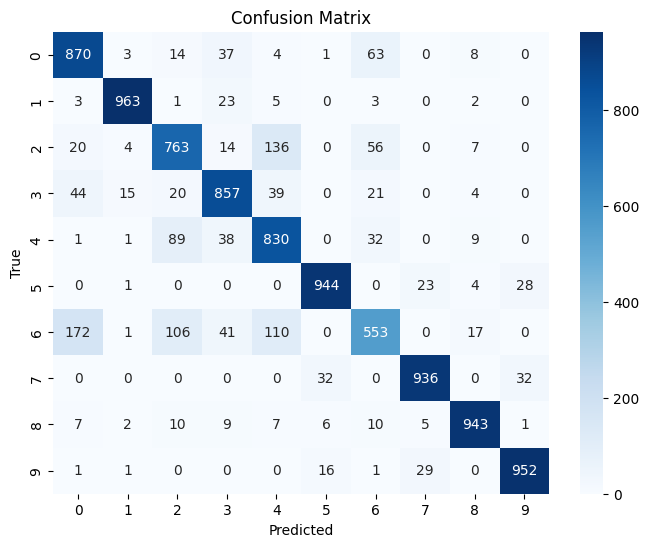

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1000
           1       0.97      0.96      0.97      1000
           2       0.76      0.76      0.76      1000
           3       0.84      0.86      0.85      1000
           4       0.73      0.83      0.78      1000
           5       0.94      0.94      0.94      1000
           6       0.75      0.55      0.64      1000
           7       0.94      0.94      0.94      1000
           8       0.95      0.94      0.95      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [36]:
# Confusion Matrix
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test

cm = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
cr = classification_report(true_classes, predicted_classes)
print("Classification Report")
print(cr)

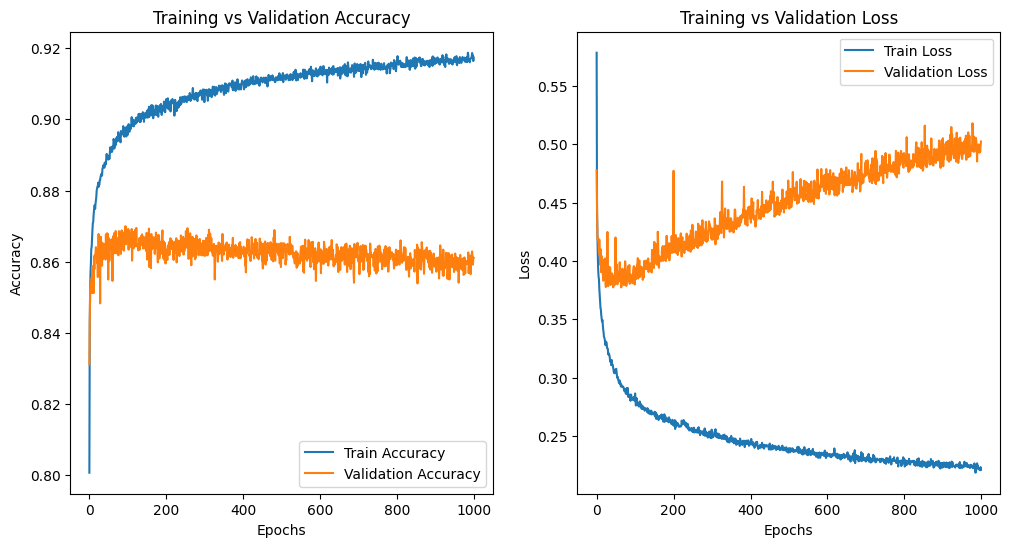

In [37]:
# Plotting training & validation accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()